# Gathering, cleaning, and organize data

## Library

In [ ]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2.15.0


## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/json coba/train_article (2).json", "r") as data_train:
    data_train = json.load(data_train)

with open("/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/json coba/val_article (1).json", "r") as data_validation:
    data_validation = json.load(data_validation)

In [ ]:
dt_kemensos = pd.read_csv("/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/Combined_Data/CSV/Kemensos/kemensos.csv")
dt_kemensos['themes'] = "kemensos"
dt_kemensos['recommendation'] = pd.Series([["Sosial", "Kemensos", "CPNS"]] * len(dt_kemensos))

dt_kemenkumham = pd.read_csv("/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/Combined_Data/CSV/Kemenkumham/kemenkumham_final.csv")
dt_kemenkumham['themes'] = "kemenkumham"
dt_kemenkumham['recommendation'] = pd.Series([["Hukum", "Kemenkumham", "CPNS"]] * len(dt_kemenkumham))

dt_kemenkominfo = pd.read_csv("/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/Combined_Data/CSV/Kemenkominfo/kemenkominfo_final.csv")
dt_kemenkominfo['themes'] = "kemenkominfo"
dt_kemenkominfo['recommendation'] = pd.Series([["Komunikasi", "Informatika", "Kemenkominfo", "CPNS"]] * len(dt_kemenkominfo))

dt_kemenkeu = pd.read_csv("/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/Combined_Data/CSV/Kemenkeu/kemenkeu_final.csv")
dt_kemenkeu['themes'] = "kemenkeu"
dt_kemenkeu['recommendation'] = pd.Series([["Keuangan", "Kemenkeu", "CPNS"]] * len(dt_kemenkeu))

dt_kemenkes = pd.read_csv("/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/Combined_Data/CSV/Kemenkes/article_kemenkes.csv")
dt_kemenkes['themes'] = "kemenkes"
dt_kemenkes['recommendation'] = pd.Series([["Kesehatan", "Kemenkes", "CPNS"]] * len(dt_kemenkes))

dt_kemenhub = pd.read_csv("/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/Combined_Data/CSV/Kemenhub/article_kemenhub.csv")
dt_kemenhub['themes'] = "kemenhub"
dt_kemenhub['recommendation'] = pd.Series([["Transportasi", "Kemenhub", "CPNS"]] * len(dt_kemenhub))

dt_kemendikbud = pd.read_csv("/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/Combined_Data/CSV/Kemendikbud/kemendikbud.csv")
dt_kemendikbud['themes'] = "kemendikbud"
dt_kemendikbud['recommendation'] = pd.Series([["Pendidikan", "Kemendikbud", "CPNS"]] * len(dt_kemendikbud))

dt_kemendagri = pd.read_csv("/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/Combined_Data/CSV/Kemendagri/article_kemendagri.csv")
dt_kemendagri['themes'] = "kemendagri"
dt_kemendagri['recommendation'] = pd.Series([["Dalam Negeri", "Kemendagri", "CPNS"]] * len(dt_kemendagri))

dt_kemenag = pd.read_csv("/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/Combined_Data/CSV/Kemenag/kemenag.csv")
dt_kemenag['themes'] = "kemenag"
dt_kemenag['recommendation'] = pd.Series([["Agama", "Kemenag", "CPNS"]] * len(dt_kemenag))

In [ ]:
dt_kemensos.head()

,Judul Berita,Link Berita,Link Gambar,themes,recommendation
0,"Terbaru, 40.839 Lowongan Kerja untuk PPPK dan ...",http://www.kompas.com/tren/read/2024/04/20/093...,https://asset.kompas.com/crops/XSaMFw3p_-yrqFK...,kemensos,"[Sosial, Kemensos, CPNS]"
1,"Link Pendaftaran CPNS, Formasi, Syarat, dan Ja...",https://www.cnbcindonesia.com/tech/20240518081...,https://awsimages.detik.net.id/visual/2023/10/...,kemensos,"[Sosial, Kemensos, CPNS]"
2,"7 Lembaga Ini Buka Formasi Jumbo CPNS, Cek Car...",https://www.cnbcindonesia.com/news/20240513092...,https://awsimages.detik.net.id/visual/2024/04/...,kemensos,"[Sosial, Kemensos, CPNS]"
3,"Lowongan CPNS 2024 Dibuka Mei Ini, Cek Syarat ...",https://www.cnbcindonesia.com/news/20240511134...,https://awsimages.detik.net.id/visual/2021/09/...,kemensos,"[Sosial, Kemensos, CPNS]"
4,"Link Pendaftaran CPNS 2024, Jadwal dan Formasi",https://www.cnbcindonesia.com/tech/20240508132...,https://awsimages.detik.net.id/visual/2023/11/...,kemensos,"[Sosial, Kemensos, CPNS]"


In [ ]:
dt_kemenkumham.head()

,Judul Berita,Link Berita,Link Gambar,themes,recommendation
0,"Janjikan Bisa Loloskan Tes CPNS Kemenkumham, P...",http://regional.kompas.com/read/2023/12/06/145...,https://asset.kompas.com/crops/FMIGB27FHDd9Q7p...,kemenkumham,"[Hukum, Kemenkumham, CPNS]"
1,"Hasil SKD CPNS Kemenkumham 2023 Diumumkan, Ini...",http://www.kompas.com/tren/read/2023/11/24/143...,https://asset.kompas.com/crops/XiF9MHgwB776X4F...,kemenkumham,"[Hukum, Kemenkumham, CPNS]"
2,"Ini Sosok Joki CPNS Kemenkumham, Mahasiswa Unh...",http://makassar.kompas.com/read/2023/11/15/171...,https://asset.kompas.com/crops/pcGV07e5V1HGkef...,kemenkumham,"[Hukum, Kemenkumham, CPNS]"
3,"Serba-serbi Ujian CPNS, Ada Kembang serta Jima...",http://regional.kompas.com/read/2023/11/15/120...,https://asset.kompas.com/crops/l9Yhg_9W9HsOqWZ...,kemenkumham,"[Hukum, Kemenkumham, CPNS]"
4,"Jadi Joki CPNS di Surabaya, Mahasiswa Dijanjik...",http://surabaya.kompas.com/read/2023/11/15/112...,https://asset.kompas.com/crops/QSXWJ_1bY5GaGAW...,kemenkumham,"[Hukum, Kemenkumham, CPNS]"


In [ ]:
dt_kemenkominfo.head()

,Judul Berita,Link Berita,Link Gambar,themes,recommendation
0,Cek Pengumuman Lokasi dan Jadwal SKD CPNS Keme...,http://money.kompas.com/read/2021/08/30/132746...,https://asset.kompas.com/crops/PNpifknoxMS3DQ0...,kemenkominfo,"[Komunikasi, Informatika, Kemenkominfo, CPNS]"
1,7 Instansi yang Buka Formasi CPNS 2024 untuk S...,https://www.detik.com/jateng/bisnis/d-7242833/...,https://akcdn.detik.net.id/community/media/vis...,kemenkominfo,"[Komunikasi, Informatika, Kemenkominfo, CPNS]"
2,Pengumuman Hasil Seleksi Administrasi CPNS dan...,https://www.detik.com/bali/berita/d-6987536/pe...,https://akcdn.detik.net.id/community/media/vis...,kemenkominfo,"[Komunikasi, Informatika, Kemenkominfo, CPNS]"
3,Kuliah di UGM Gratis? Cek Syarat Beasiswa S2 K...,https://www.detik.com/edu/beasiswa/d-6092707/k...,https://akcdn.detik.net.id/community/media/vis...,kemenkominfo,"[Komunikasi, Informatika, Kemenkominfo, CPNS]"
4,Cek Pengumuman Akhir CPNS 2021 Kominfo hingga ...,https://finance.detik.com/cpns/d-5873936/cek-p...,https://akcdn.detik.net.id/community/media/vis...,kemenkominfo,"[Komunikasi, Informatika, Kemenkominfo, CPNS]"


In [ ]:
dt_kemenkeu.head()

,Judul Berita,Link Berita,Link Gambar,themes,recommendation
0,"Cara Masuk STAN, Kuliah Gratis Lulusan Jadi CP...",http://www.kompas.com/edu/read/2022/12/01/1627...,https://asset.kompas.com/crops/kZYGWuyHl9odlLj...,kemenkeu,"[Keuangan, Kemenkeu, CPNS]"
1,Ini Link Pengumuman Hasil Seleksi CPNS 2019 Ke...,http://www.kompas.com/tren/read/2020/10/31/123...,https://asset.kompas.com/crops/gZUnfcG98ein4Ex...,kemenkeu,"[Keuangan, Kemenkeu, CPNS]"
2,Ini Jadwal dan Lokasi SKB CPNS Kemenkeu,http://www.kompas.com/tren/read/2020/08/21/080...,https://asset.kompas.com/crops/fS3_wq81yxiug3v...,kemenkeu,"[Keuangan, Kemenkeu, CPNS]"
3,[POPULER MONEY] Jiwasraya Akan Ditutup | Rekru...,http://money.kompas.com/read/2020/07/09/060800...,https://asset.kompas.com/crops/6bIt8kAJaIpipGd...,kemenkeu,"[Keuangan, Kemenkeu, CPNS]"
4,Kemenkeu Hentikan Sementara Rekrutmen CPNS dan...,http://money.kompas.com/read/2020/07/08/100810...,https://asset.kompas.com/crops/O6Sp43ZplGmfWm1...,kemenkeu,"[Keuangan, Kemenkeu, CPNS]"


In [ ]:
dt_kemenkes.head()

,Judul Berita,Link Berita,Link Gambar,Tema Berita,themes,recommendation
0,"Link Pendaftaran CPNS, Formasi, Syarat, dan Ja...",https://www.cnbcindonesia.com/tech/20240518081...,https://awsimages.detik.net.id/visual/2023/10/...,Kemenkes,kemenkes,"[Kesehatan, Kemenkes, CPNS]"
1,"7 Lembaga Ini Buka Formasi Jumbo CPNS, Cek Car...",https://www.cnbcindonesia.com/news/20240513092...,https://awsimages.detik.net.id/visual/2024/04/...,Kemenkes,kemenkes,"[Kesehatan, Kemenkes, CPNS]"
2,"Lowongan CPNS 2024 Dibuka Mei Ini, Cek Syarat ...",https://www.cnbcindonesia.com/news/20240511134...,https://awsimages.detik.net.id/visual/2021/09/...,Kemenkes,kemenkes,"[Kesehatan, Kemenkes, CPNS]"
3,"Bangun 4 RS Raksasa, Kemenkes Buka Lowongan Ke...",https://www.cnbcindonesia.com/news/20240508174...,https://awsimages.detik.net.id/visual/2024/05/...,Kemenkes,kemenkes,"[Kesehatan, Kemenkes, CPNS]"
4,"Link Pendaftaran CPNS 2024, Jadwal dan Formasi",https://www.cnbcindonesia.com/tech/20240508132...,https://awsimages.detik.net.id/visual/2023/11/...,Kemenkes,kemenkes,"[Kesehatan, Kemenkes, CPNS]"


In [ ]:
dt_kemenhub.head()

,Judul Berita,Link Berita,Link Gambar,themes,recommendation
0,"Link Pendaftaran CPNS, Formasi, Syarat, dan Ja...",https://www.cnbcindonesia.com/tech/20240518081...,https://awsimages.detik.net.id/visual/2023/10/...,kemenhub,"[Transportasi, Kemenhub, CPNS]"
1,"7 Lembaga Ini Buka Formasi Jumbo CPNS, Cek Car...",https://www.cnbcindonesia.com/news/20240513092...,https://awsimages.detik.net.id/visual/2024/04/...,kemenhub,"[Transportasi, Kemenhub, CPNS]"
2,"Lowongan CPNS 2024 Dibuka Mei Ini, Cek Syarat ...",https://www.cnbcindonesia.com/news/20240511134...,https://awsimages.detik.net.id/visual/2021/09/...,kemenhub,"[Transportasi, Kemenhub, CPNS]"
3,"Link Pendaftaran CPNS 2024, Jadwal dan Formasi",https://www.cnbcindonesia.com/tech/20240508132...,https://awsimages.detik.net.id/visual/2023/11/...,kemenhub,"[Transportasi, Kemenhub, CPNS]"
4,"Catat! Ini Syarat, Jadwal, Formasi dan Link Pe...",https://www.cnbcindonesia.com/tech/20240504173...,https://awsimages.detik.net.id/visual/2023/08/...,kemenhub,"[Transportasi, Kemenhub, CPNS]"


In [ ]:
dt_kemendikbud.head()

,Judul Berita,Link Berita,Link Gambar,themes,recommendation
0,Kemendikbudristek Buka 40.541 Lowongan CPNS da...,https://finance.detik.com/cpns/d-7273960/kemen...,https://akcdn.detik.net.id/community/media/vis...,kemendikbud,"[Pendidikan, Kemendikbud, CPNS]"
1,ASN,https://finance.detik.com/kamus/asn-d-6998077,https://akcdn.detik.net.id/community/media/vis...,kemendikbud,"[Pendidikan, Kemendikbud, CPNS]"
2,Daftar Instansi CPNS dan PPPK yang Belum ada P...,https://finance.detik.com/cpns/d-6953253/dafta...,https://akcdn.detik.net.id/community/media/vis...,kemendikbud,"[Pendidikan, Kemendikbud, CPNS]"
3,"Cara Daftar CPNS 2023 yang Dibuka Hari Ini, Bi...",https://finance.detik.com/cpns/d-6940564/cara-...,https://akcdn.detik.net.id/community/media/vis...,kemendikbud,"[Pendidikan, Kemendikbud, CPNS]"
4,"Sederet Fakta Lowongan CPNS Dibuka Juni 2023, ...",https://finance.detik.com/cpns/d-6539855/seder...,https://akcdn.detik.net.id/community/media/vis...,kemendikbud,"[Pendidikan, Kemendikbud, CPNS]"


In [ ]:
dt_kemendagri.head()

,Judul Berita,Link Berita,Link Gambar,themes,recommendation
0,CASN 2023: Loker CPNS di 7 Instansi Ini Tak Sy...,https://www.cnbcindonesia.com/news/20230925093...,https://awsimages.detik.net.id/visual/2023/09/...,kemendagri,"[Dalam Negeri, Kemendagri, CPNS]"
1,Daftar CPNS & PPPK 7 Instansi Ini Tidak Syarat...,https://www.cnbcindonesia.com/news/20230922181...,https://awsimages.detik.net.id/visual/2021/09/...,kemendagri,"[Dalam Negeri, Kemendagri, CPNS]"
2,"CASN 2023 Dibuka hingga Oktober, Ini Link, Jad...",https://www.cnbcindonesia.com/news/20230922061...,https://awsimages.detik.net.id/visual/2023/08/...,kemendagri,"[Dalam Negeri, Kemendagri, CPNS]"
3,"Link Pendaftaran CPNS 2023 Buka 20.00 WIB, Cek...",https://www.cnbcindonesia.com/tech/20230920171...,https://awsimages.detik.net.id/visual/2021/10/...,kemendagri,"[Dalam Negeri, Kemendagri, CPNS]"
4,Pendaftaran CPNS 2023 Dibuka: Ini Link Formasi...,https://www.cnbcindonesia.com/tech/20230920072...,https://awsimages.detik.net.id/visual/2023/08/...,kemendagri,"[Dalam Negeri, Kemendagri, CPNS]"


In [ ]:
dt_kemenag.head()

,Judul Berita,Link Berita,Link Gambar,themes,recommendation
0,Kapan Seleksi CPNS 2024 Dibuka? Ini Bocoran da...,https://finance.detik.com/cpns/d-7303416/kapan...,https://akcdn.detik.net.id/community/media/vis...,kemenag,"[Agama, Kemenag, CPNS]"
1,"Kemenag Buka 110.553 Formasi CPNS & PPPK, buat...",https://finance.detik.com/cpns/d-7302881/kemen...,https://akcdn.detik.net.id/community/media/vis...,kemenag,"[Agama, Kemenag, CPNS]"
2,"Nih Daftar Formasi CPNS & PPPK di Kementerian,...",https://finance.detik.com/cpns/d-7302820/nih-d...,https://akcdn.detik.net.id/community/media/vis...,kemenag,"[Agama, Kemenag, CPNS]"
3,Rekor Terbesar dalam Sejarah! Kemenag Buka 110...,https://finance.detik.com/cpns/d-7272602/rekor...,https://akcdn.detik.net.id/community/media/vis...,kemenag,"[Agama, Kemenag, CPNS]"
4,"Cara Daftar CPNS 2023 yang Dibuka Hari Ini, Bi...",https://finance.detik.com/cpns/d-6940564/cara-...,https://akcdn.detik.net.id/community/media/vis...,kemenag,"[Agama, Kemenag, CPNS]"


## Pre-processing Data

In [ ]:
def clean_titles(titles):
    clean = []
    stopwords_id = stopwords.words('indonesian')

    for title in titles:
        title = title.lower()
        title = re.sub(r'\d+', '', title)
        title = re.sub(r'[^\w\s]', '', title)
        words = title.split()
        clean_words = [word for word in words if word not in stopwords_id]
        clean.append(' '.join(clean_words))
    return clean

In [ ]:
from sklearn.model_selection import train_test_split

# Define a function to split the data
def split_data(titles):
    train, val = train_test_split(titles, test_size=0.3, random_state=42)
    return clean_titles(train), clean_titles(val)

# Split and clean titles for each ministry

# Ministry of Social Affairs (Kemensos)
keywords_kemensos_train, keywords_kemensos_val = split_data(dt_kemensos['Judul Berita'])

# Ministry of Law and Human Rights (Kemenkumham)
keywords_kemenkumham_train, keywords_kemenkumham_val = split_data(dt_kemenkumham['Judul Berita'])

# Ministry of Communication and Information Technology (Kemenkominfo)
keywords_kemenkominfo_train, keywords_kemenkominfo_val = split_data(dt_kemenkominfo['Judul Berita'])

# Ministry of Finance (Kemenkeu)
keywords_kemenkeu_train, keywords_kemenkeu_val = split_data(dt_kemenkeu['Judul Berita'])

# Ministry of Health (Kemenkes)
keywords_kemenkes_train, keywords_kemenkes_val = split_data(dt_kemenkes['Judul Berita'])

# Ministry of Transportation (Kemenhub)
keywords_kemenhub_train, keywords_kemenhub_val = split_data(dt_kemenhub['Judul Berita'])

# Ministry of Education and Culture (Kemendikbud)
keywords_kemendikbud_train, keywords_kemendikbud_val = split_data(dt_kemendikbud['Judul Berita'])

# Ministry of Home Affairs (Kemendagri)
keywords_kemendagri_train, keywords_kemendagri_val = split_data(dt_kemendagri['Judul Berita'])

# Ministry of Religious Affairs (Kemenag)
keywords_kemenag_train, keywords_kemenag_val = split_data(dt_kemenag['Judul Berita'])

In [ ]:
# Updating the JSON data with cleaned keywords
def update_json_data(json_data, tema_berita, train_keywords, val_keywords):
    for tema, train_kw, val_kw in zip(tema_berita, train_keywords, val_keywords):
        index = next((i for i, d in enumerate(json_data["berita"]) if d["tema_berita"] == tema), None)
        if index is not None:
            json_data["berita"][index]["keywords"].extend(train_kw)

tema_berita = ["kemensos", "kemenkumham", "kemenkominfo", "kemenkeu", "kemenkes", "kemenhub", "kemendikbud", "kemendagri", "kemenag"]
train_keywords = [keywords_kemensos_train, keywords_kemenkumham_train, keywords_kemenkominfo_train, keywords_kemenkeu_train, keywords_kemenkes_train, keywords_kemenhub_train, keywords_kemendikbud_train, keywords_kemendagri_train, keywords_kemenag_train]
val_keywords = [keywords_kemensos_val, keywords_kemenkumham_val, keywords_kemenkominfo_val, keywords_kemenkeu_val, keywords_kemenkes_val, keywords_kemenhub_val, keywords_kemendikbud_val, keywords_kemendagri_val, keywords_kemenag_val]

update_json_data(data_train, tema_berita, train_keywords, val_keywords)
update_json_data(data_validation, tema_berita, train_keywords, val_keywords)

In [ ]:
def labelling(json_data):
    keywords, themes, recommendation = [], [], []
    themes_label = {}
    for news in json_data['berita']:
        keywords.extend(news['keywords'])
        themes.extend([news['tema_berita']] * len(news['keywords']))
        recommendation.extend([news['recommendation']] * len(news['keywords']))
        themes_label[news['tema_berita']] = news['recommendation']
    return keywords, themes, recommendation, themes_label

In [ ]:
keywords, themes, recommendation, labels_recommendation = labelling(data_train)
validation_keywords, validation_themes, _, _ = labelling(data_validation)

# Model Build and Compile

## Tokenize

In [ ]:
# Tokenize
trunc_type='post'
padding_type='post'
tokenizer = Tokenizer()

def preprocess_text(train_data, val_data):
    all_keywords = train_data + val_data
    tokenizer.fit_on_texts(all_keywords)

    # Generate sequences
    training_sequences = tokenizer.texts_to_sequences(train_data)
    validation_sequences = tokenizer.texts_to_sequences(val_data)

    word_index = tokenizer.word_index
    vocab_size = len(word_index) + 1
    print(word_index)
    max_sequence_length = max(len(seq) for seq in training_sequences + validation_sequences)

    # Generate pad sequences
    padded_train_sequences = pad_sequences(training_sequences, maxlen=max_sequence_length, padding=padding_type, truncating=trunc_type)
    padded_val_sequences = pad_sequences(validation_sequences, maxlen=max_sequence_length, padding=padding_type, truncating=trunc_type)

    return padded_train_sequences, padded_val_sequences, word_index, max_sequence_length, vocab_size

label_mapping = {"kemensos": 0, "kemenkumham": 1, "kemenkominfo": 2, "kemenkeu": 3, "kemenkes": 4, "kemenhub": 5, "kemendikbud": 6, "kemendagri": 7, "kemenag": 8}
num_classes = len(label_mapping)

# Unpack the returned values correctly
padded_train_sequences, padded_val_sequences, word_index, max_sequence_length, vocab_size = preprocess_text(keywords, validation_keywords)

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical([label_mapping[label] for label in themes[:len(padded_train_sequences)]], num_classes=num_classes)
y_validation = tf.keras.utils.to_categorical([label_mapping[label] for label in validation_themes[:len(padded_val_sequences)]], num_classes=num_classes)

{'cpns': 1, 'formasi': 2, 'buka': 3, 'lowongan': 4, 'cek': 5, 'daftar': 6, 'pppk': 7, 'pendaftaran': 8, 'dibuka': 9, 'kemenkumham': 10, 'instansi': 11, 'tes': 12, 'seleksi': 13, 'syarat': 14, 'link': 15, 'pns': 16, 'joki': 17, 'sekolah': 18, 'jadwal': 19, 'kedinasan': 20, 'casn': 21, 'kemenhub': 22, 'peserta': 23, 'kemenag': 24, 'kementerian': 25, 'pendidikan': 26, 'transportasi': 27, 'makassar': 28, 'gaji': 29, 'hasil': 30, 'rp': 31, 'pengumuman': 32, 'sri': 33, 'mulyani': 34, 'juta': 35, 'kemenkeu': 36, 'lulusan': 37, 'terbaru': 38, 'pemberdayaan': 39, 'jimat': 40, 'kemenkes': 41, 'daerah': 42, 'pemulihan': 43, 'pengembangan': 44, 'kesehatan': 45, 'pengawasan': 46, 'simak': 47, 'surabaya': 48, 'lembaga': 49, 'kemendikbud': 50, 'daftarnya': 51, 'skor': 52, 'negara': 53, 'pemantauan': 54, 'layanan': 55, 'sma': 56, 'kerja': 57, 'bawa': 58, 'agama': 59, 'keamanan': 60, 'pencegahan': 61, 'yuk': 62, 'formasinya': 63, 'sosial': 64, 'skd': 65, 'jatim': 66, 'tertinggi': 67, 'sistem': 68, 'keu

In [ ]:
# Convert themes to categorical labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(themes)
validation_labels = label_encoder.transform(validation_themes)

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)

# Load pre-trained GloVe embeddings
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

glove_path = '/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/glove.6B.100d.txt'
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        idx = word_index.get(word)
        if idx:
            embedding_matrix[idx] = vector

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if(logs.get('val_accuracy')>0.81):
            print("\nAkurasi Sudah Tinggi")
            self.model.stop_training = True

In [ ]:
# Model using pre-trained embeddings
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),  # Added Batch Normalization
    tf.keras.layers.Dropout(0.3),  # Adjusted Dropout
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.BatchNormalization(),  # Added Batch Normalization
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),  # Adjusted Dropout
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(padded_train_sequences, train_labels, epochs=50, batch_size=32, validation_data=(padded_val_sequences, validation_labels), callbacks=[myCallback()], verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13, 100)           110200    
                                                                 
 bidirectional (Bidirection  (None, 13, 512)           731136    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 13, 512)           2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 512)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               656384    
 onal)                                                           
                                                        

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 13, 100)           110200    
                                                                 
 bidirectional_17 (Bidirect  (None, 13, 512)           731136    
 ional)                                                          
                                                                 
 batch_normalization_6 (Bat  (None, 13, 512)           2048      
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 13, 512)           0         
                                                                 
 bidirectional_18 (Bidirect  (None, 256)               656384    
 ional)                                                          
                                                      

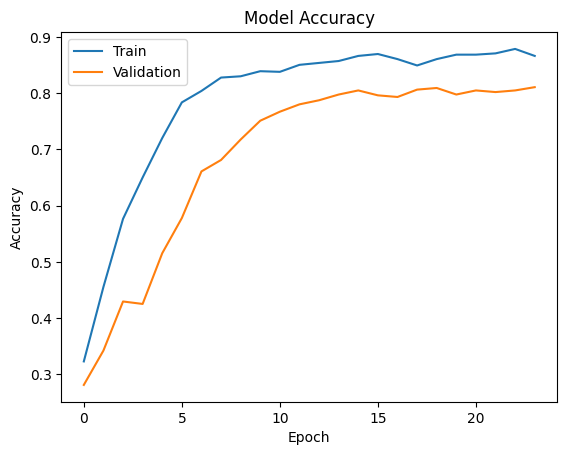

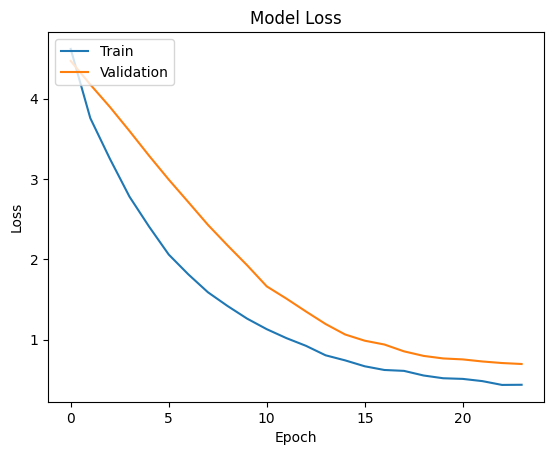

In [ ]:
# Plotting accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Model Evaluation

## Load Title Articles

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/Capstone/Model2_Recommender_Berita/Combined_Data/CSV/Combined_Themes/sampled_data_new.csv")

In [ ]:
data_test

,Judul Berita,Link Berita,Link Gambar,themes,recommendation
0,Terbaru! Formasi CPNS & PPPK 2024 di 7 Kemente...,https://www.cnbcindonesia.com/news/20240425060...,https://awsimages.detik.net.id/visual/2023/11/...,kemensos,"['Sosial', 'Kemensos', 'CPNS']"
1,Terbaru! Kemensos Buka 40.839 Formasi PPAK di ...,https://www.cnbcindonesia.com/news/20240419135...,https://awsimages.detik.net.id/visual/2023/05/...,kemensos,"['Sosial', 'Kemensos', 'CPNS']"
2,"Lowongan CPNS 2024 Dibuka Mei Ini, Cek Syarat ...",https://www.cnbcindonesia.com/news/20240511134...,https://awsimages.detik.net.id/visual/2021/09/...,kemensos,"['Sosial', 'Kemensos', 'CPNS']"
3,"Kemensos Buka 117 Lowongan CPNS, Catat Nih Sya...",https://finance.detik.com/cpns/d-4781253/kemen...,https://akcdn.detik.net.id/community/media/vis...,kemensos,"['Sosial', 'Kemensos', 'CPNS']"
4,CASN 2024: Ini 7 Instansi yang Buka Lowongan C...,https://www.cnbcindonesia.com/news/20240422062...,https://awsimages.detik.net.id/visual/2023/11/...,kemensos,"['Sosial', 'Kemensos', 'CPNS']"
...,...,...,...,...,...
238,Siap-siap! Seleksi Petugas Haji 2023 Gunakan S...,https://www.cnbcindonesia.com/news/20230126070...,https://awsimages.detik.net.id/visual/2022/07/...,kemenag,"['Agama', 'Kemenag', 'CPNS']"
239,"Catat! Ini Syarat, Jadwal, Formasi dan Link Pe...",https://www.cnbcindonesia.com/tech/20240504173...,https://awsimages.detik.net.id/visual/2023/08/...,kemenag,"['Agama', 'Kemenag', 'CPNS']"
240,Ini Link Daftar CPNS 2024: Jadwal-Formasi & Sy...,https://www.cnbcindonesia.com/tech/20240523070...,https://awsimages.detik.net.id/visual/2023/09/...,kemenag,"['Agama', 'Kemenag', 'CPNS']"
241,"Link Pendaftaran CPNS, Formasi, Syarat, dan Ja...",https://www.cnbcindonesia.com/tech/20240518081...,https://awsimages.detik.net.id/visual/2023/10/...,kemenag,"['Agama', 'Kemenag', 'CPNS']"


## Pre-process titles

In [ ]:
def clean_titles(titles):
    clean = []
    stopwords_id = stopwords.words('indonesian')

    for title in titles:
        title = title.lower()
        title = re.sub(r'\d+', '', title)
        title = re.sub(r'[^\w\s]', '', title)

        words = title.split()
        clean_words = [word for word in words if word not in stopwords_id]
        clean_words = ' '.join(clean_words)
        clean.append(clean_words)
        cleaned_titles = ' '.join([str(word) for word in clean])

    return cleaned_titles

## Test titles

In [ ]:
from sklearn.utils import shuffle
n_samples_per_theme = 5

# Group by 'themes' and sample equally
sampled_data = data_test.groupby('themes').apply(lambda x: x.sample(n_samples_per_theme, replace=True)).reset_index(drop=True)

# Shuffle the sampled data
sampled_data = shuffle(sampled_data).reset_index(drop=True)

# Extract the 'Judul Berita' column
sample = sampled_data['Judul Berita']

# Print the list of sampled titles
print(list(sample))

# Get the count of each theme in the sample
label_counts = sample.apply(lambda x: data_test.loc[data_test['Judul Berita'] == x, 'themes'].iloc[0]).value_counts()
print(label_counts)

['CPNS 2023 Buka Formasi untuk Lulusan SMA, Digaji Berapa?', 'Seleksi CPNS 2023: 6 Instansi Ini Buka Lowongan!', '6 Fakta CPNS Bakamla Tutup Usia Saat Latihan Coast Guard', 'Menteri PANRB: Ada 671.731 ASN Pensiun hingga 2027', 'Terbaru! Formasi CPNS & PPPK 2024 di 7 Kementerian', 'Nih Daftar Formasi CPNS & PPPK di Kementerian, Kemenag Buka Paling Banyak!', 'Biar Tak Salah! Simak Bedanya Seleksi CPNS dan CPPPK', 'Kemenag Buka 1.361 Formasi CPNS, Ini Informasi Lengkapnya!', 'Link Pendaftaran CPNS, Formasi, Syarat, dan Jadwalnya', 'CASN Kemenag 2023: Syarat Khusus Hafal Al-Quran 30 Juz', 'Link Pendaftaran CPNS, Formasi, Syarat, dan Jadwalnya', 'Cara Cek Formasi CPNS Kemenhub 2023, beserta Syarat dan Dokumennya', 'Formasi Lengkap 1 Juta Lowongan ASN yang Dibuka Tahun Ini', 'Link Jadwal dan Lokasi Tes SKD CPNS 2019 Kemenag di 34 Provinsi', 'Gaji ke-13 Cair! Ingat Dibayar Tak Full 100% & Tak Serentak', 'Cara Daftar CPNS 2023 yang Dibuka Hari Ini, Bisa Cek Gaji kalau Lolos', 'Kemendagri Buka 

In [ ]:
testing = clean_titles(sample)

In [ ]:
print(testing)

cpns buka formasi lulusan sma digaji seleksi cpns instansi buka lowongan fakta cpns bakamla tutup usia latihan coast guard menteri panrb asn pensiun terbaru formasi cpns pppk kementerian nih daftar formasi cpns pppk kementerian kemenag buka biar salah simak bedanya seleksi cpns cpppk kemenag buka formasi cpns informasi lengkapnya link pendaftaran cpns formasi syarat jadwalnya casn kemenag syarat khusus hafal alquran juz link pendaftaran cpns formasi syarat jadwalnya cek formasi cpns kemenhub beserta syarat dokumennya formasi lengkap juta lowongan asn dibuka link jadwal lokasi tes skd cpns kemenag provinsi gaji cair dibayar full serentak daftar cpns dibuka cek gaji lolos kemendagri buka puluhan formasi cpns simak syarat daftarnya bismillah kemenag buka lowongan pppk cek pengumuman lokasi jadwal skd cpns kemenkominfo cek link cpnsdephubgoid formasi pppk link pengumuman hasil pascasanggah cpns bkn kemendagri kemenpanrb gaji pns cair cek besarannya lowongan cpns instansi sepi peminat kemen

In [ ]:
test_sequence = tokenizer.texts_to_sequences([testing])
padded_test_sequence = pad_sequences(test_sequence, maxlen=max_sequence_length)
prediction = model.predict(padded_test_sequence)[0]

recommended_berita_index = tf.argmax(prediction).numpy()
recommended_berita = [label for label, index in label_mapping.items() if index == recommended_berita_index][0]

print("Rekomendasi: " + recommended_berita)

1/1 [==============================] - 56s 56s/step
Rekomendasi: kemenkes


# Convert Model

## Saved to h5 format

In [ ]:
model.save("recommender.h5")
reconstructed_model = tf.keras.models.load_model("recommender.h5")
tf.saved_model.save(model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


TypeError: save() missing 1 required positional argument: 'export_dir'